In [1]:
import numpy as np
import pandas as pd
from datetime import date

import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
cars = pd.read_csv('data.csv')
cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
len(cars)

11914

# Initial Data Preparation

Convert column names to lower case, remove spaces for ease of use

In [4]:
cars.columns = cars.columns.str.lower().str.replace(' ', '_')

In Pandas, strings are represented by ndarray objects. So dtype of string columns are 'object'. See below.

In [5]:
cars.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

We need to do the same process for all strings in the dataframe. Convert to lower case and add _ in place of spaces

In [6]:
string_cols = list(cars.dtypes[cars.dtypes == 'object'].index)
string_cols

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [7]:
for col in string_cols:
    cars[col] = cars[col].str.lower().str.replace(' ', '_')

In [8]:
cars.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# Exploratory Data Analysis

Distribution of prices

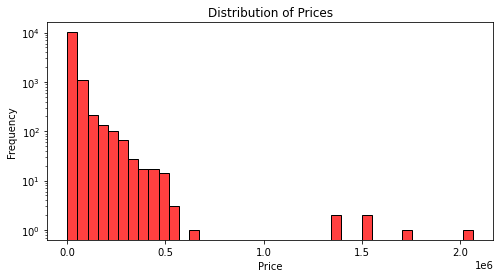

In [9]:
plt.figure(figsize=(8,4))

seaborn.histplot(cars.msrp, bins=40, color="red")
plt.ylabel("Frequency")
plt.xlabel("Price")
ax = plt.gca()
ax.set_yscale('log')
plt.title("Distribution of Prices")

plt.show()

Removing Outliers and doing a non-logarithmic analysis, to observe a better spread

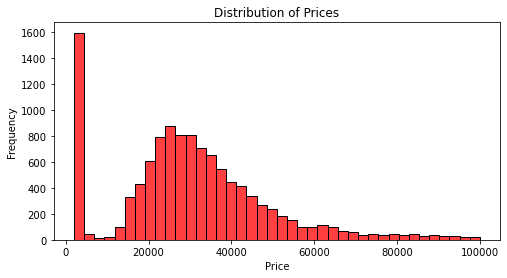

In [10]:
plt.figure(figsize=(8,4))

seaborn.histplot(cars.loc[(cars.msrp < 100000), 'msrp'], bins=40, color="red")
plt.ylabel("Frequency")
plt.xlabel("Price")
plt.title("Distribution of Prices")

plt.show()

Log transformation of prices

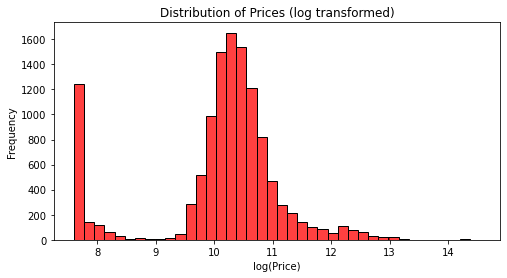

In [11]:
plt.figure(figsize=(8,4))

log_prices = np.log(cars.msrp)
seaborn.histplot(log_prices, bins=40, color="red")
plt.ylabel("Frequency")
plt.xlabel("log(Price)")
plt.title("Distribution of Prices (log transformed)")

plt.show()

Checking the null values

In [12]:
cars.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# Validation framework

In [13]:
np.random.seed(2)

n = len(cars)

#Split in sets - 60-20-20
n_validation = int(0.2*n)
n_test = int(0.2*n)
n_train = n - (n_validation + n_test)

idx = np.arange(n)
np.random.shuffle(idx)
print(idx)

[2735 6720 5878 ... 6637 2575 7336]


In [14]:
cars_shuffled = cars.iloc[idx]

In [15]:
cars_train = cars_shuffled.iloc[:n_train].copy()
cars_test = cars_shuffled.iloc[n_train:n_train+n_test].copy()
cars_validation = cars_shuffled.iloc[n_train+n_test:].copy()

Separating target variable from the features, in both log and original forms.

In [16]:
y_train_orig = cars_train.msrp.values
y_validation_orig = cars_validation.msrp.values
y_test_orig = cars_test.msrp.values

y_train = np.log(cars_train.msrp.values)
y_validation = np.log(cars_validation.msrp.values)
y_test = np.log(cars_test.msrp.values)

del cars_train['msrp']
del cars_validation['msrp']
del cars_test['msrp']

In [17]:
cars_test.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
2779,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385
3708,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617
4794,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657
10498,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204
1880,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873


# Linear Regression

Training function from scratch

In [18]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])  
    # The column of ones is added for adding the constant term to linear regression. 
    # Weights of 1 will be calculated in the process. w0 * 1 = w0

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

# Baseline solution

Using a few columns only.

In [19]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [20]:
def prepare_X(df, base):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

Training

In [21]:
X_train = prepare_X(cars_train, base)
w_0, w = train_linear_regression(X_train, y_train)

In [22]:
y_pred = w_0 + X_train.dot(w)

Comparing predicted results with actual values

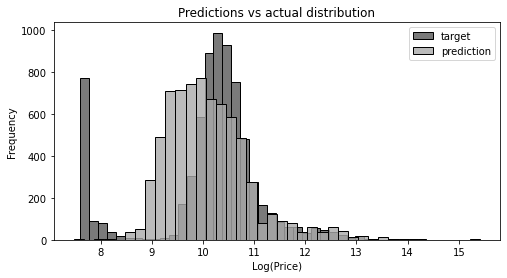

In [23]:
plt.figure(figsize=(8, 4))

seaborn.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
seaborn.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price)')
plt.title('Predictions vs actual distribution')

plt.show()

### Error

On training set itself

In [24]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [25]:
rmse(y_train, y_pred)

0.7555385345360104

On validation set

In [26]:
X_validation = prepare_X(cars_validation, base)
y_pred = w_0 + X_validation.dot(w)
rmse(y_validation, y_pred)

0.7360277451716254

# Feature Engineering

Adding age of the vehicle by subtracting the year from current year

In [27]:
def prepare_X(df, base):
    df = df.copy()
    features = base.copy()

    df['age'] = date.today().year - df.year
    features.append('age')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [28]:
X_train = prepare_X(cars_train, base)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('RMSE train', rmse(y_train, y_pred))

X_validation = prepare_X(cars_validation, base)
y_pred = w_0 + X_validation.dot(w)
print('RMSE validation', rmse(y_validation, y_pred))

RMSE train 0.517572873467676
RMSE validation 0.5149887121715718


RMSE has decreased after this stage of feature engineering.

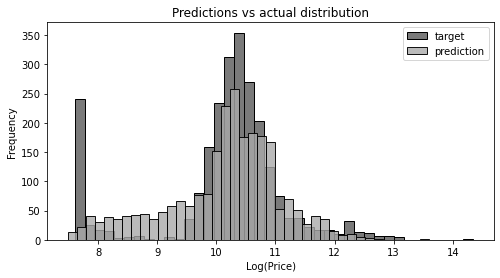

In [29]:
plt.figure(figsize=(8, 4))


seaborn.histplot(y_validation, label='target', color='#222222', alpha=0.6, bins=40)
seaborn.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price)')
plt.title('Predictions vs actual distribution')

plt.show()

Adding one-hot encoded features for top 5 makes and number of doors

In [30]:
cars.make.value_counts().head(5)

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: make, dtype: int64

In [31]:
cars.number_of_doors.value_counts()

4.0    8353
2.0    3160
3.0     395
Name: number_of_doors, dtype: int64

In [32]:
def prepare_X(df, base):
    df = df.copy()
    features = base.copy()

    df['age'] = date.today().year - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [33]:
X_train = prepare_X(cars_train, base)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('RMSE train', rmse(y_train, y_pred))

X_validation = prepare_X(cars_validation, base)
y_pred = w_0 + X_validation.dot(w)
print('RMSE validation', rmse(y_validation, y_pred))

RMSE train 0.5059548801150818
RMSE validation 0.5051377485412765


One-hot encoding of top 4 engine fuel types

In [34]:
cars.engine_fuel_type.value_counts()

regular_unleaded                                7172
premium_unleaded_(required)                     2009
premium_unleaded_(recommended)                  1523
flex-fuel_(unleaded/e85)                         899
diesel                                           154
electric                                          66
flex-fuel_(premium_unleaded_required/e85)         54
flex-fuel_(premium_unleaded_recommended/e85)      26
flex-fuel_(unleaded/natural_gas)                   6
natural_gas                                        2
Name: engine_fuel_type, dtype: int64

In [35]:
def prepare_X(df, base):
    df = df.copy()
    features = base.copy()

    df['age'] = date.today().year - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [36]:
X_train = prepare_X(cars_train, base)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('RMSE train', rmse(y_train, y_pred))

X_validation = prepare_X(cars_validation, base)
y_pred = w_0 + X_validation.dot(w)
print('RMSE validation', rmse(y_validation, y_pred))

RMSE train 0.478915110169191
RMSE validation 0.47160651422697364


One-hot encoding of top 3 transmission types

In [37]:
def prepare_X(df, base):
    df = df.copy()
    features = base.copy()

    df['age'] = date.today().year - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [38]:
X_train = prepare_X(cars_train, base)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('RMSE train', rmse(y_train, y_pred))

X_validation = prepare_X(cars_validation, base)
y_pred = w_0 + X_validation.dot(w)
print('RMSE validation', rmse(y_validation, y_pred))

RMSE train 0.474604790759096
RMSE validation 0.4631149112191942


One-hot encoding of drivetrain type and top 5 of market category, vehicle size and style.

In [39]:
cars.driven_wheels.value_counts()

front_wheel_drive    4787
rear_wheel_drive     3371
all_wheel_drive      2353
four_wheel_drive     1403
Name: driven_wheels, dtype: int64

In [40]:
cars.market_category.value_counts().head(5)

crossover             1110
flex_fuel              872
luxury                 855
luxury,performance     673
hatchback              641
Name: market_category, dtype: int64

In [41]:
cars.vehicle_size.value_counts().head(5)

compact    4764
midsize    4373
large      2777
Name: vehicle_size, dtype: int64

In [42]:
cars.vehicle_style.value_counts().head(5)

sedan            3048
4dr_suv          2488
coupe            1211
convertible       793
4dr_hatchback     702
Name: vehicle_style, dtype: int64

In [43]:
def prepare_X(df, base):
    df = df.copy()
    features = base.copy()

    df['age'] = date.today().year - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)

    for v in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheens_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)

    for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)

    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)

    for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [44]:
X_train = prepare_X(cars_train, base)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('RMSE train', rmse(y_train, y_pred))

X_validation = prepare_X(cars_validation, base)
y_pred = w_0 + X_validation.dot(w)
print('RMSE validation', rmse(y_validation, y_pred))

RMSE train 156.17770602118418
RMSE validation 70.84403047885266


Something has suddenly gone wrong, and the RMSE has shot up. We also see below that the weights are also very large.

In [45]:
w_0

1093275764354003.2

# Regularization

In [46]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    # Adding a regularization factor.
    # np.eye(n) returns an identity matrix of size n
    # To not add any regularization, simply keep r=0
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [47]:
X_train = prepare_X(cars_train, base)

Trying different regularization factors, and checking random values of weights

In [48]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[7], w[18]))

    0, 1093275764354003.25, -5292.89, 201.48
0.001, 7.43, -1.27, -0.25
 0.01, 7.42, -1.25, -0.25
  0.1, 7.29, -1.09, -0.22
    1, 6.42, -0.13, -0.01
   10, 4.52, 0.96, 0.83


In [49]:
X_train = prepare_X(cars_train, base)
X_validation = prepare_X(cars_validation, base)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    print("r =", r)
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%.2f, %.2f, %.2f' % (w_0, w[16], w[3]))
    
    y_pred = w_0 + X_train.dot(w)
    print('RMSE train', rmse(y_train, y_pred))

    y_pred = w_0 + X_validation.dot(w)
    print('RMSE validation', rmse(y_validation, y_pred))
    print()

r = 0
1093275764354003.25, -183.73, -2.54
RMSE train 156.17770602118418
RMSE validation 70.84403047885266

r = 1e-06
1009.39, -0.31, 0.01
RMSE train 0.4643781838016126
RMSE validation 0.4572307108936412

r = 0.0001
7.42, -0.31, 0.01
RMSE train 0.4643781838137844
RMSE validation 0.4572309592550739

r = 0.001
7.43, -0.31, 0.01
RMSE train 0.46437818758707383
RMSE validation 0.4572322927943663

r = 0.01
7.42, -0.31, 0.01
RMSE train 0.46437856072811035
RMSE validation 0.4572456404430521

r = 0.1
7.29, -0.31, 0.01
RMSE train 0.4644121666561074
RMSE validation 0.45738275440075493

r = 1
6.42, -0.26, 0.01
RMSE train 0.4659511646712555
RMSE validation 0.45892048815996106

r = 5
5.12, -0.10, 0.02
RMSE train 0.47343246143189976
RMSE validation 0.4656697080493023

r = 10
4.52, 0.04, 0.02
RMSE train 0.48092255805697914
RMSE validation 0.47297446101701945



# Using the model

Picking a random sample from test set and deriving the price

In [50]:
i = 2
ad = cars_test.iloc[i].to_dict()
ad

{'make': 'ford',
 'model': 'focus',
 'year': 2017,
 'engine_fuel_type': 'flex-fuel_(unleaded/e85)',
 'engine_hp': 160.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'manual',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'flex_fuel',
 'vehicle_size': 'compact',
 'vehicle_style': 'sedan',
 'highway_mpg': 36,
 'city_mpg': 26,
 'popularity': 5657}

In [51]:
X_train = prepare_X(cars_train, base)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.0001)

In [52]:
X_test = prepare_X(pd.DataFrame([ad]), base)[0]
y_pred = w_0 + X_test.dot(w)
suggestion = np.exp(y_pred)
suggestion

25047.29040445494

In [53]:
actual = y_test_orig[i]
actual

16775

RMSE for entire test set

In [54]:
X_test = prepare_X(cars_test, base)
y_pred = w_0 + X_test.dot(w)
print('RMSE test', rmse(y_test, y_pred))

RMSE test 0.46028945220260153
